# Initial Setup

Set necessary imports, preprocess, and run model utilizing same process as in EDA.

# Setup

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import uniform, randint
from sklearn.decomposition import PCA
import time

# read data
path = 'MFG10YearTerminationData.csv'
data = pd.read_csv(path)

### Common Functions Used

In [41]:
def categorize_job(title):
  """
  Categorizes various job titles into a different broad categories
  """
  for category, titles in job_categories.items():
      if title in titles:
          return category
  return None

def categorize_city(population):
  """
  Categorizes cities into different categories based on population
  """
  if population >= 100000:
      return 'urban'
  elif population >= 10000:
      return 'suburban'
  else:
      return 'rural'

def create_and_map_labels(df, column):
  """
  Creates a dictionary of labels for a given column
  """
  labels = {value: key for key, value in enumerate(df[column].unique())}
  df[column] = df[column].map(labels)
  return labels

# Data Description

There is one CSV file called HREmployee data. This file consists of data related to employees that worked at IBM. This includes qualitative and quantitative data related to each employee related to personal information and relationship to their job.

### View shape and general information of data

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [43]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


### Display first few rows of data

In [44]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [45]:
data.shape

(49653, 18)

### Check number of NaN data points

In [46]:
data.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

### Drop any duplicate values and drop any unneeded columns

In [47]:
data.drop(['EmployeeID', 'birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   orighiredate_key     49653 non-null  object
 1   terminationdate_key  49653 non-null  object
 2   age                  49653 non-null  int64 
 3   length_of_service    49653 non-null  int64 
 4   city_name            49653 non-null  object
 5   department_name      49653 non-null  object
 6   job_title            49653 non-null  object
 7   store_name           49653 non-null  int64 
 8   gender_short         49653 non-null  object
 9   termreason_desc      49653 non-null  object
 10  termtype_desc        49653 non-null  object
 11  STATUS_YEAR          49653 non-null  int64 
 12  STATUS               49653 non-null  object
 13  BUSINESS_UNIT        49653 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.3+ MB


### Feature engineering to consolidate columns and update cities to represent populations

In [48]:
job_categories = {
    'executive': ['CEO', 'VP Stores', 'Chief Information Officer', 'VP Human Resources', 'VP Finance'],
    'director': ['Director, Recruitment', 'Director, Accounts Receivable', 'Director, Accounting',
                 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology',
                 'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
                 'Director, Compensation'],
    'assistant': ['Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'Exec Assistant, Human Resources',
                  'Exec Assistant, Finance'],
    'manager': ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager', 'Bakery Manager',
                'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager'],
    'staff': ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier', 'Shelf Stocker', 'Recruiter',
              'HRIS Analyst', 'Accounting Clerk', 'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receivable Clerk',
              'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst', 'Investment Analyst', 'Systems Analyst',
              'Corporate Lawyer', 'Legal Counsel']
}

city_populations = {
    'Vancouver': 675218, 'Victoria': 367770, 'Nanaimo': 90504, 'New Westminster': 83200, 'Kelowna': 144576,
    'Burnaby': 257927, 'Kamloops': 90504, 'Prince George': 74333, 'Cranbrook': 19909, 'Surrey': 517887,
    'Richmond': 230584, 'Terrace': 19100, 'Chilliwack': 108324, 'Trail': 7814, 'Langley': 28394, 'Vernon': 43552,
    'Squamish': 20380, 'Quesnel': 9925, 'Abbotsford': 153524, 'North Vancouver': 58556, 'Fort St John': 20200,
    'Williams Lake': 11434, 'West Vancouver': 42473, 'Port Coquitlam': 58653, 'Aldergrove': 12363,
    'Fort Nelson': 3912, 'Nelson': 10750, 'New Westminister': 83200, 'Grand Forks': 4099, 'White Rock': 82238,
    'Haney': 82656, 'Princeton': 2708, 'Dawson Creek': 12578, 'Bella Bella': 1028, 'Ocean Falls': 130,
    'Pitt Meadows': 19620, 'Cortes Island': 1095, 'Valemount': 1025, 'Dease Lake': 340, 'Blue River': 158
}

data['job_title_category'] = data['job_title'].apply(categorize_job)
data['city_population'] = data['city_name'].map(city_populations)
data['city_size_category'] = data['city_population'].apply(categorize_city)

### Data Processing

Lets modify the labels for each relevant column as well as grab imports for our models.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import uniform, randint
from sklearn.decomposition import PCA
import time

# Apply the function to each relevant column
city_name_label = create_and_map_labels(data, 'city_name')
department_name_label = create_and_map_labels(data, 'department_name')
job_title_label = create_and_map_labels(data, 'job_title')
gender_short_label = create_and_map_labels(data, 'gender_short')
term_desc_label = create_and_map_labels(data, 'termreason_desc')
termtype_desc_label = create_and_map_labels(data, 'termtype_desc')
status_label = create_and_map_labels(data, 'STATUS')
business_label = create_and_map_labels(data, 'BUSINESS_UNIT')


### Split target column from remaining dataframe

In [50]:
x = data[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = data[['STATUS']]

### Model Evaluation

The evaluation will start by refitting the Decision Tree model with the results of the GridSearchCV

### Splitting data into training and testing sets and applying a standard scaler

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Flatenning train and test variables to 1 dimension
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

numerical_transformer = StandardScaler()

x_train = numerical_transformer.fit_transform(X_train)
x_test = numerical_transformer.transform(X_test)

### Creating a pipeline with just the model

In [52]:
decision_tree_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10))
    ]).fit(x_train, y_train)

### Model Statistics

The model has an accuracy of 0.99, a precision of 0.94 to 0.99, recall between 0.76 to 1.00, and an f1-score between 0.84 to 1.00

In [53]:
y_pred = decision_tree_pipeline.predict(x_test)
print(classification_report(y_test, y_pred))
print("accuracy: {:0.5f}".format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9638
           1       0.93      0.76      0.84       293

    accuracy                           0.99      9931
   macro avg       0.96      0.88      0.92      9931
weighted avg       0.99      0.99      0.99      9931

accuracy: 0.99144


### Model Testing

We can utilize some sample datapoints from our datasets to manually test whether or not the data will correctly predict if a set of information represents an employee being terminated or not. Based on the points tested below, the model is able to accurately test both cases where an employee is terminated and an employee is not terminated.

##### Prediction based on employee not terminated

In [54]:
y_pred0 = decision_tree_pipeline.predict(x_test)[0]
print(f'Prediction: {y_pred0} \nActual: {y_test[0]} \nEmployee Information: {X_test.iloc[0]}')

Prediction: 0 
Actual: 0 
Employee Information: age                    24
length_of_service       0
city_name               6
department_name        19
job_title              45
store_name             15
gender_short            1
STATUS_YEAR          2009
BUSINESS_UNIT           1
Name: 42756, dtype: int64


##### Prediction based on employee terminated

In [55]:
# Index 9928 contains a case where status is terminated
y_pred1 = decision_tree_pipeline.predict(x_test)[9928]
print(f'Predicted class: {y_pred1} \nActual class: {y_test[9928]} \nDetails: {X_test.iloc[9928]}')

Predicted class: 1 
Actual class: 1 
Details: age                    60
length_of_service       8
city_name              10
department_name        10
job_title              44
store_name             28
gender_short            0
STATUS_YEAR          2008
BUSINESS_UNIT           1
Name: 49130, dtype: int64


### Model Interpretation and Analysis

After determining above that the model is able to accurately predict employee attrition given information about an employee. We can know move on to analyzing and interpreting the different considerations and factors the model takes into account to make these determinations. We'll look at a few different metrics/visualizations which will give a better understanding of what features are importance to the model, what the learning curve is like for it, a visualization of the decision tree, ROC curve, Precision-Recall curve, and Calibration curve.

##### Decision Tree Feature Importance

The age feature has the highest importance score, which means that it is the most influential feature in the model's decisions. However, features with lower scores such as BUSINESS_UNIT and job_title, are less meaningful to the decision tree's process of determining attrition.

This chart helps us assess what features are impacting our decision process and can also further help us determine further opportunities of where we should grow the dataset.

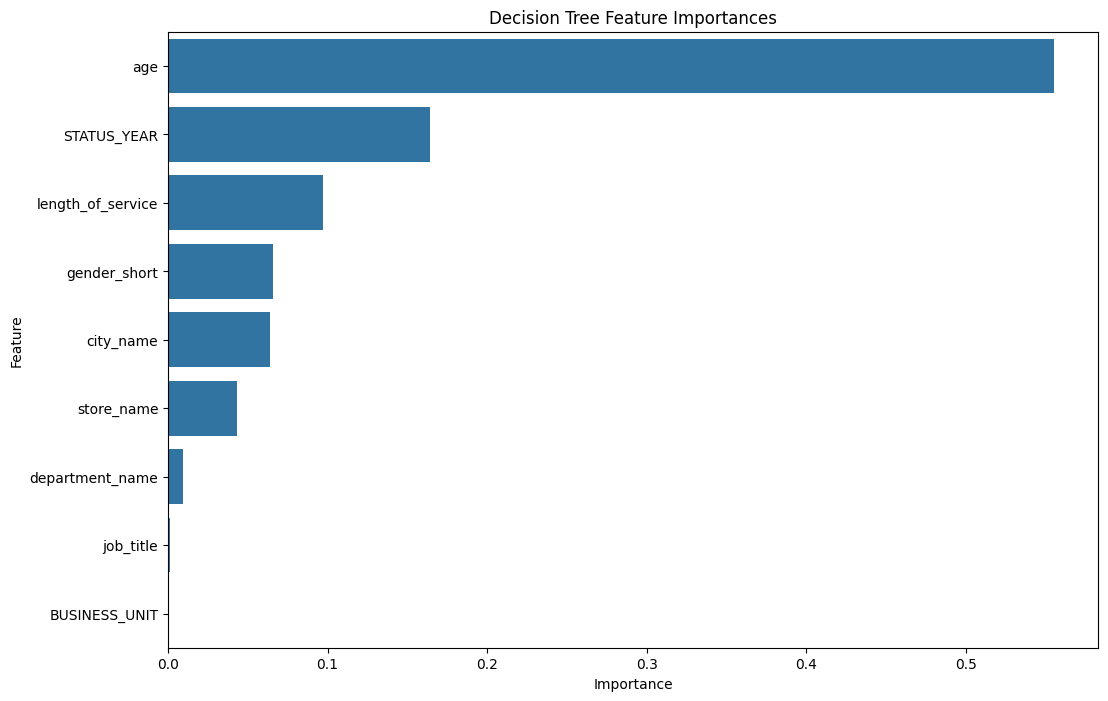

In [56]:
decision_tree = decision_tree_pipeline.named_steps['classifier']
feature_importances = decision_tree.feature_importances_

# Create a DataFrame for feature importances
features = X_train.columns
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Decision Tree Feature Importances')
plt.show()

##### Learning Curve

Next we'll take a look at the learning curve of the model which showcases how well the model is performing based on the size of the dataset increasing. We notice that in the case of the decision tree it starts off at a very high accuracy when the dataset is small and slightly decreases as the dataset continues to grow. This is expected of Decision Tree modles where they are able to fit/overfit data when the dataset is small but being to lose accuracy as the dataset grows. We see the inverse occur for the validation, where it begins at a lower accuracy but as the dataset continues to grow the accuracy grows as well. This makes sense as we see that the model is begins to generalize better as the dataset continues to grow in size.

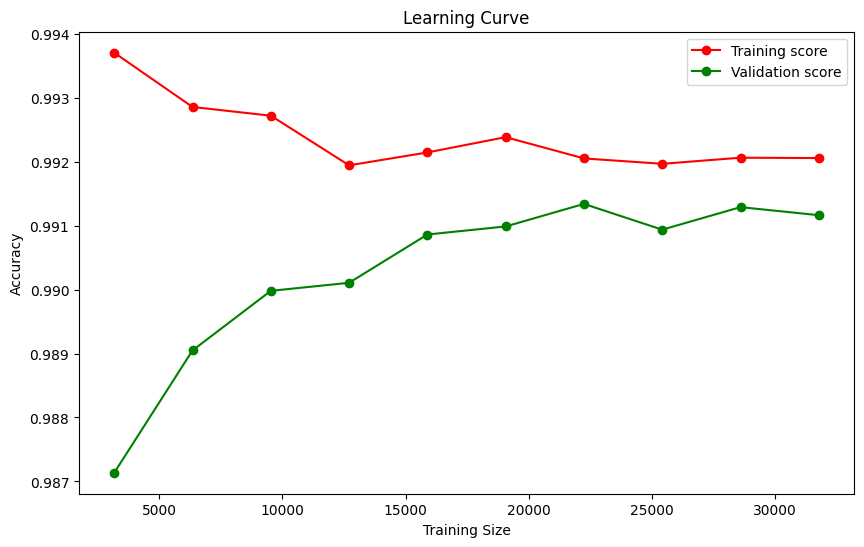

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np

# Compute learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    decision_tree_pipeline, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color='g', label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

##### Validation Curve

Next we'll take a look at this validation curve. The validation curve helps us assess how a model's parameter differs based on specific hyperparameters. In the case of this graph we are comparing the validation and training score to the max depth of the decision tree. Looking at the graph we see that initially at a lower max depth (2 - 2.5) the validation and training score both have lower accuracy. After we increase the max depth from 3 to 5 we see a significant jump in accuracy bringing the validation and training score to about 0.990. After that we see a slight and continuous increase for the training score but a decrease in validation score after about 11 depth. Which may mean that the increase in complexity makes the decision tree less impactful and effective and that 10 - 11 nodes may be the most optimal for this model.

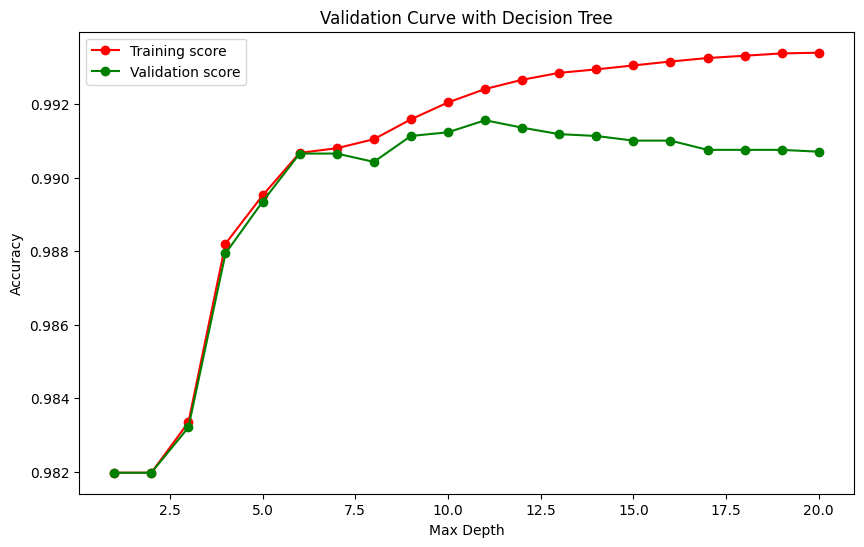

In [58]:
from sklearn.model_selection import validation_curve

# Compute validation curve for different values of max_depth
param_range = np.arange(1, 21)
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(criterion='entropy', min_samples_split=10), X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(param_range, valid_scores.mean(axis=1), 'o-', color='g', label='Validation score')
plt.title('Validation Curve with Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

##### Decision Tree Visualization

Next we'll look at a visualization of the Decision Tree. We see that this visualization showcases the varying branches and leaf nodes that determine the prediction or classification. Each node in the tree has a condition and based on that condition redirects the data which determines predictions. A decision is determined when a leaf node is reached and the classification for that leaf node determines the prediction.

Based on the visualization we also see that the depth of the tree is significant. This and the other data we've seen may indicate that there is a potential issue of overfitting with this model. We also notice that a majority of the conditions in the branches are based on `age` for splitting which agrees with the feature importance we've seen in the charts.

In [59]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(100, 100))
plot_tree(decision_tree_pipeline.named_steps['classifier'], filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree')
plt.show()


### Conclusion

Overall, this study provided key insights into potential opportunities for employers to assess what may be significant factors that play a role in identifying employees at risk for attrition. Employers could take advantage of this model and continue to feed in data to identify additional features that may allow them to further identify these risks. For instance, we notice that `Age` and `status_year` are very impactful. Throughout the research and exploratory process, we noticed that typically all the models (decision tree, logistic regression, random forest, k-nearest-neighbor) all relatively high model accuracy, f1-scores, and ROC-AUC scores depicting the models providing good results.

### Future Work

We notice that the `Age` plays a large role in attrition for a majority of employees. Further work in this area could result in determining factors that may lead to age whether that be due to employees growing older and wanting to retire versus potentially younger employees leaving for a variety of other reasons. To further this research, I believe pulling data from other companies and sources could provide more insights for employers that across different companies what attrition looks like and assess general patterns that may come up.

This work includes looking into additional datasets (such as IBM Attrition dataset or private data from multiple companies) and individually running models on them and trying to combine datasets and running the models against a combine dataset. This I believe would provide varying results that can definitely help the models generalize more accurately. Additionally, I believe that further tuning of hyperparameters can also help improve the models and further this research. This can include updating the criterion options for the decision tree model or incorporating other models such as Neural Networks, XgbBooster.